In [ ]:
!pip install xgboost scikit-learn

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv( "churn.csv" )

In [5]:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
sns.set_style( style = "whitegrid" )
plt.figure( figsize = ( 12 , 10 ) )

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Churn Distribution')

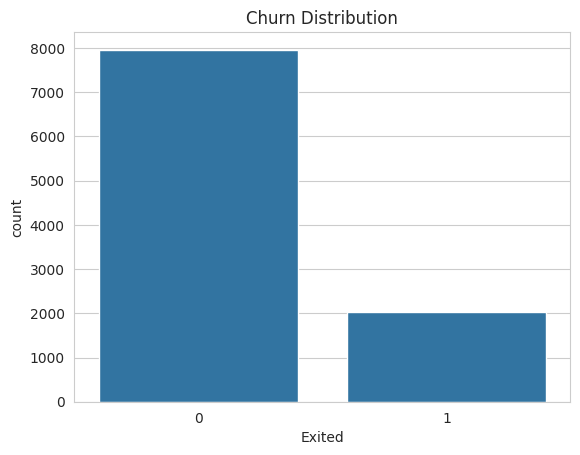

In [8]:
sns.countplot( x = "Exited", data = df )
plt.title( "Churn Distribution")

Text(0.5, 1.0, 'Age Distribution')

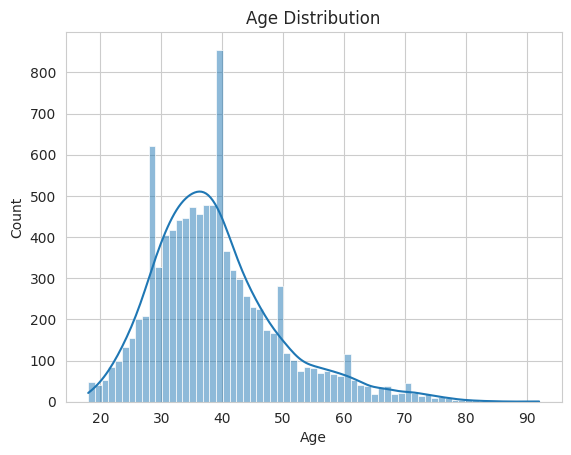

In [9]:
sns.histplot( data = df , x = "Age", kde = True )
plt.title( "Age Distribution" )

Text(0.5, 1.0, 'Credit Score x Age')

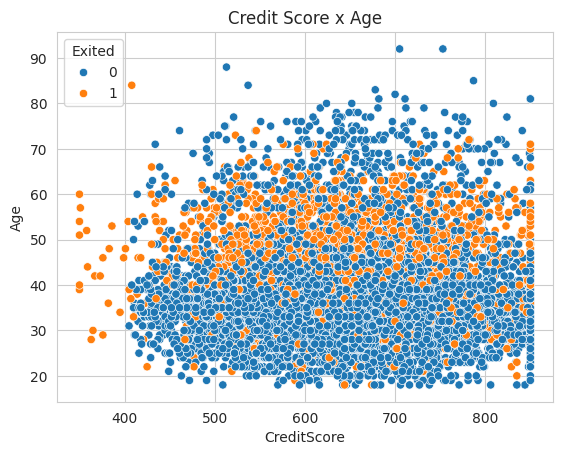

In [10]:
sns.scatterplot( data = df, x = "CreditScore", y = "Age", hue = "Exited" )
plt.title( "Credit Score x Age" )

Text(0.5, 1.0, 'Balance Distribution by Churn')

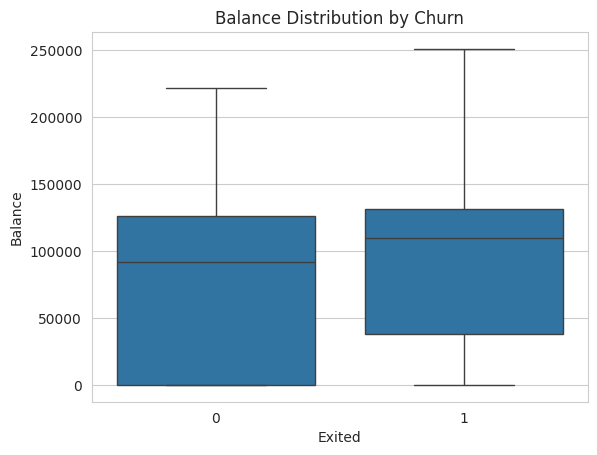

In [11]:
sns.boxplot( x = "Exited", y = "Balance", data = df )
plt.title( "Balance Distribution by Churn" )

Text(0.5, 1.0, 'Credit Score Distribution by Churn')

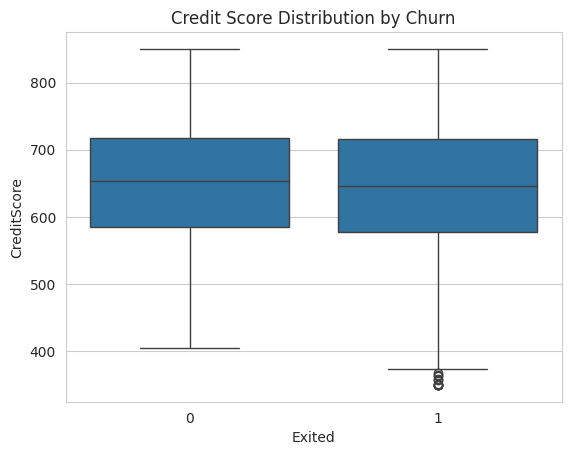

In [12]:
sns.boxplot( x = "Exited", y = "CreditScore", data = df )
plt.title( "Credit Score Distribution by Churn" )

Start Preprocessing Data

In [13]:
features = df.drop( "Exited", axis = 1 )

In [14]:
features.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
target = df[ 'Exited' ]

In [16]:
target.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [17]:
features = features.drop( [ "RowNumber", "CustomerId", "Surname" ], axis = 1 )
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [18]:
features = features.dropna()
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [19]:
features = pd.get_dummies( features, columns = [ "Geography", "Gender" ] )
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [21]:
# X_train, X_test, y_train, y_test =  train_test_split( features, target, test_size = 0.2, random_state = 42 )

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = target

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import xgboost as xgb
import numpy as np
import pickle

In [64]:
def evaluate_and_save_model( model, X, y, filename, smote = False, cv = 5 ):

  skf = StratifiedKFold( n_splits = cv, shuffle = True, random_state = 42 )
  smote = SMOTE( random_state = 42 )

  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []

  for fold, ( train_index, test_index ) in enumerate( skf.split( X, y ), 1 ):
    X_train, X_test = X[ train_index ], X[ test_index ]
    y_train, y_test = y[ train_index ], y[ test_index ]


    if smote  == True:
       X, y = smote.fit_resample( X_train, y_train )

    model.fit( X, y )
    y_pred = model.predict( X_test )

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append( accuracy )

    report = classification_report( y_test, y_pred, output_dict = True )

    precision_scores.append(report[ 'weighted avg' ][ 'precision' ] )
    recall_scores.append(report[ 'weighted avg' ][ 'recall' ] )
    f1_scores.append(report[ 'weighted avg' ][ 'f1-score' ] )

  print(f"{model.__class__.__name__} Cross-Validation Metrics (Averaged across {cv} folds):")
  print(f"Average Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
  print(f"Average Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
  print(f"Average Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
  print(f"Average F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


  model.fit(X, y)
  with open( filename, "wb" ) as file:
    pickle.dump( model, file )

  print( f"Model saved as: { filename }" )
  print( "---------------" )

In [42]:
lr_model = LogisticRegression( random_state = 42 )
evaluate_and_save_model( lr_model, X, y, "lr_model.pkl" )

xgb_model = xgb.XGBClassifier( random_state = 42 )
evaluate_and_save_model( xgb_model, X, y, "xgb_model.pkl" )

dt_model = DecisionTreeClassifier( random_state = 42 )
evaluate_and_save_model( dt_model,  X, y, "dt_model.pkl" )

rf_model = RandomForestClassifier( random_state = 42 )
evaluate_and_save_model( rf_model,  X, y, "rf_model.pkl" )


nb_model = GaussianNB()
evaluate_and_save_model( nb_model, X, y, "nb_model.pkl" )


knn_model = KNeighborsClassifier()
evaluate_and_save_model( knn_model, X, y,"knn_model.pkl" )


svm_model = SVC( random_state = 42 )
evaluate_and_save_model( svm_model,  X, y, "svm_model.pkl" )


LogisticRegression Cross-Validation Metrics (Averaged across 5 folds):
Average Accuracy: 0.8102 ± 0.0054
Average Precision: 0.7799 ± 0.0098
Average Recall: 0.8102 ± 0.0054
Average F1 Score: 0.7727 ± 0.0067
Model saved as: lr_model.pkl
---------------
XGBClassifier Cross-Validation Metrics (Averaged across 5 folds):
Average Accuracy: 0.9441 ± 0.0047
Average Precision: 0.9445 ± 0.0048
Average Recall: 0.9441 ± 0.0047
Average F1 Score: 0.9417 ± 0.0051
Model saved as: xgb_model.pkl
---------------
DecisionTreeClassifier Cross-Validation Metrics (Averaged across 5 folds):
Average Accuracy: 1.0000 ± 0.0000
Average Precision: 1.0000 ± 0.0000
Average Recall: 1.0000 ± 0.0000
Average F1 Score: 1.0000 ± 0.0000
Model saved as: dt_model.pkl
---------------
Model saved as: rf_model.pkl
---------------
GaussianNB Cross-Validation Metrics (Averaged across 5 folds):
Average Accuracy: 0.8150 ± 0.0034
Average Precision: 0.7955 ± 0.0038
Average Recall: 0.8150 ± 0.0034
Average F1 Score: 0.8000 ± 0.0033
Mode

In [43]:
feature_importance = xgb_model.feature_importances_
feature_names = features.columns

feature_importance


array([0.03226174, 0.11177262, 0.03203743, 0.05501035, 0.31480518,
       0.03242506, 0.18277512, 0.0318335 , 0.03704621, 0.08930133,
       0.036012  , 0.04471945, 0.        ], dtype=float32)

In [44]:
feature_names

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [45]:
feature_importance_df = pd.DataFrame( {
    'feature': feature_names,
    'importance': feature_importance
} )
feature_importance_df = feature_importance_df.sort_values( 'importance', ascending = False )
feature_importance_df

,feature,importance
4,NumOfProducts,0.314805
6,IsActiveMember,0.182775
1,Age,0.111773
9,Geography_Germany,0.089301
3,Balance,0.055010
11,Gender_Female,0.044719
8,Geography_France,0.037046
10,Geography_Spain,0.036012
5,HasCrCard,0.032425
0,CreditScore,0.032262


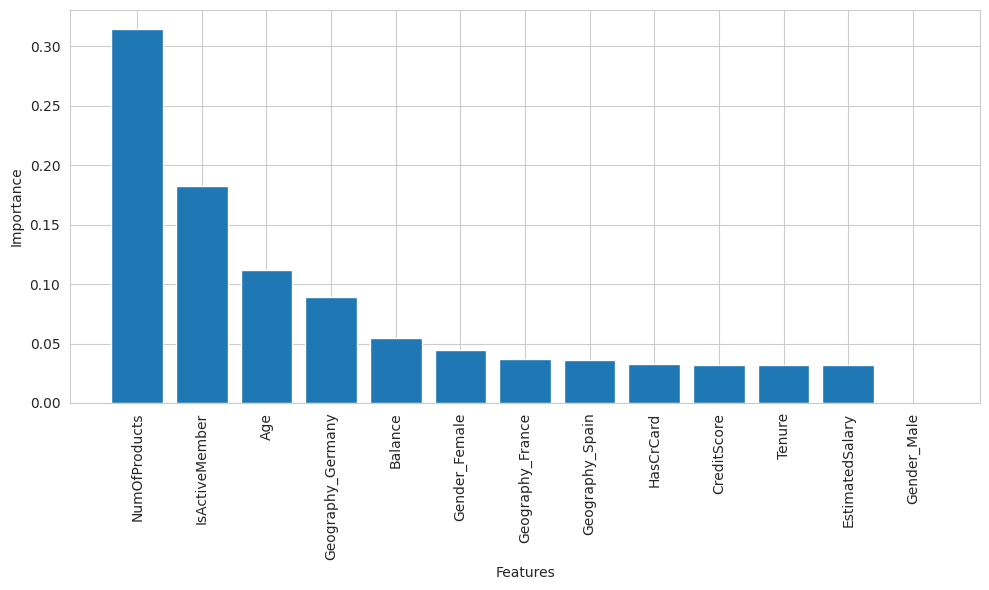

In [46]:
plt.figure( figsize = ( 10,6 ) )
plt.bar( feature_importance_df[ 'feature' ], feature_importance_df[ 'importance' ] )
plt.xticks( rotation = 90 )
plt.xlabel( "Features" )
plt.ylabel( "Importance" )
plt.tight_layout()
plt.show()

In [47]:
features[ 'CLV' ] = df[ 'Balance'] * df[ "EstimatedSalary"] / 100000
features[ 'AgeGroup '] = pd.cut( df[ 'Age' ], bins = [ 0, 30, 45, 60, 100 ], labels = [ "Young", "MiddleAge", "Senior", "Elderly" ] )
features[ 'TenureAgeRatio' ] = features[ 'Tenure' ] / features [ 'Age' ]
features[ 'ProductActivity' ] = df[ 'NumOfProducts' ] * df[ 'IsActiveMember' ]
features[ 'HighRiskAgeGroup' ] = df[ 'Age' ].apply( lambda x: 1 if 45 <= x < 60 else 0 )
features[ 'BalanceTenureRatio' ] = df[ 'Balance' ] / ( df[ 'Tenure' ] + 1 )

In [48]:
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CLV,AgeGroup,TenureAgeRatio,ProductActivity,HighRiskAgeGroup,BalanceTenureRatio
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False,0.000000,MiddleAge,0.047619,1,0,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False,94319.527887,MiddleAge,0.024390,1,0,41903.930000
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False,181904.056115,MiddleAge,0.190476,0,0,17740.088889
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False,0.000000,MiddleAge,0.025641,0,0,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False,99259.102400,MiddleAge,0.046512,1,0,41836.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,False,True,0.000000,MiddleAge,0.128205,0,0,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,False,True,58344.761420,MiddleAge,0.285714,1,0,5215.419091
9997,709,36,7,0.00,1,0,1,42085.58,True,False,False,True,False,0.000000,MiddleAge,0.194444,1,0,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,False,True,69736.344344,MiddleAge,0.071429,0,0,18768.827500


In [49]:
features = pd.get_dummies( features, drop_first = True )
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,...,Gender_Female,Gender_Male,CLV,TenureAgeRatio,ProductActivity,HighRiskAgeGroup,BalanceTenureRatio,AgeGroup _MiddleAge,AgeGroup _Senior,AgeGroup _Elderly
0,619,42,2,0.00,1,1,1,101348.88,True,False,...,True,False,0.000000,0.047619,1,0,0.000000,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,...,True,False,94319.527887,0.024390,1,0,41903.930000,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,...,True,False,181904.056115,0.190476,0,0,17740.088889,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,...,True,False,0.000000,0.025641,0,0,0.000000,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,...,True,False,99259.102400,0.046512,1,0,41836.940000,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,...,False,True,0.000000,0.128205,0,0,0.000000,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,...,False,True,58344.761420,0.285714,1,0,5215.419091,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,...,True,False,0.000000,0.194444,1,0,0.000000,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,...,False,True,69736.344344,0.071429,0,0,18768.827500,True,False,False


In [ ]:
# X_train, X_test, y_train, y_test =  train_test_split( features, target, test_size = 0.2, random_state = 42 )

In [51]:
xgboost_model_fe = xgb.XGBClassifier( random_state = 42 )
evaluate_and_save_model( xgboost_model_fe, X, y, "xgboost_model-fe.pkl" )

XGBClassifier Cross-Validation Metrics (Averaged across 5 folds):
Average Accuracy: 0.9441 ± 0.0047
Average Precision: 0.9445 ± 0.0048
Average Recall: 0.9441 ± 0.0047
Average F1 Score: 0.9417 ± 0.0051
Model saved as: xgboost_model-fe.pkl
---------------


In [65]:
evaluate_and_save_model( xgboost_model_fe,  X, y, "xgboost_model-smote.pkl", smote=True )

XGBClassifier Cross-Validation Metrics (Averaged across 5 folds):
Average Accuracy: 0.9441 ± 0.0047
Average Precision: 0.9445 ± 0.0048
Average Recall: 0.9441 ± 0.0047
Average F1 Score: 0.9417 ± 0.0051
Model saved as: xgboost_model-smote.pkl
---------------


In [66]:
voting_clf = VotingClassifier(
    estimators = [ ('xgboost', xgb.XGBClassifier( random_state = 42 ) ), ( 'rf', RandomForestClassifier( random_state = 42 ) ), ( 'svm', SVC( random_state = 42, probability = True ) )  ],
    voting = 'hard'
)

In [67]:
evaluate_and_save_model( voting_clf,  X, y, "voting_clf.pkl", smote = True )

VotingClassifier Cross-Validation Metrics (Averaged across 5 folds):
Average Accuracy: 0.9485 ± 0.0046
Average Precision: 0.9500 ± 0.0044
Average Recall: 0.9485 ± 0.0046
Average F1 Score: 0.9460 ± 0.0051
